#CNN
温度データから内部欠陥の位置と大きさを推定するプログラム

In [62]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [63]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_size_path = './../tmp_simulation/tmp_data/one_hole_size_data.csv'
one_hole_position_path = './../tmp_simulation/tmp_data/one_hole_position_data.csv'
four_holes_size_path = './../tmp_simulation/tmp_data/four_holes_size_data.csv'
four_holes_position_path = './../tmp_simulation/tmp_data/four_holes_position_data.csv'
nine_holes_size_path = './../tmp_simulation/tmp_data/nine_holes_size_data.csv'
nine_holes_position_path = './../tmp_simulation/tmp_data/nine_holes_position_data.csv'
sixteen_holes_size_path = './../tmp_simulation/tmp_data/sixteen_holes_size_data.csv'
sixteen_holes_position_path = './../tmp_simulation/tmp_data/sixteen_holes_position_data.csv'
twentyfive_holes_size_path = './../tmp_simulation/tmp_data/twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = './../tmp_simulation/tmp_data/twentyfive_holes_position_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_y_data = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(four_holes_size_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(nine_holes_size_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(sixteen_holes_size_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])
with open(twentyfive_holes_size_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    size_x_data.append(data_array[1:-1])
    size_y_data.append(data_array[0])

#### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  for line in fp1:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(four_holes_position_path) as fp2:
  for line in fp2:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(nine_holes_position_path) as fp3:
  for line in fp3:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(sixteen_holes_position_path) as fp4:
  for line in fp4:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])
with open(twentyfive_holes_position_path) as fp5:
  for line in fp5:
    data_array = line.split(',')
    position_x_data.append(data_array[1:-1])
    position_y_data.append(data_array[0])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=int)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
size_y_data = keras.utils.to_categorical(size_y_data, 6)
position_y_data = (position_y_data-1)
position_y_data = keras.utils.to_categorical(position_y_data, 25)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(8108, 50, 1)
size_x_test = size_x_test.reshape(2027, 50, 1)
position_x_train = position_x_train.reshape(8108, 50, 1)
position_x_test = position_x_test.reshape(2027, 50, 1)

In [45]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [46]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/1000
8108/8108 [==============================] - 0s 42us/step - loss: 1.6043 - accuracy: 0.2884 - val_loss: 1.5445 - val_accuracy: 0.3680
Epoch 2/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.5089 - accuracy: 0.4137 - val_loss: 1.4858 - val_accuracy: 0.4050
Epoch 3/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.4454 - accuracy: 0.4174 - val_loss: 1.4174 - val_accuracy: 0.3680
Epoch 4/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3907 - accuracy: 0.4315 - val_loss: 1.3746 - val_accuracy: 0.5220
Epoch 5/1000
8108/8108 [==============================] - 0s 24us/step - loss: 1.3543 - accuracy: 0.4628 - val_loss: 1.3431 - val_accuracy: 0.4608
Epoch 6/1000
8108/8108 [==============================] - 0s 25us/step - loss: 1.3212 - accuracy: 0.4948 - val_loss: 1.3229 - val_accuracy: 0.3996
Epoch 7/1000
8108/8108 [==============================] - 0s 25us/step

8108/8108 [==============================] - 0s 24us/step - loss: 0.8404 - accuracy: 0.6996 - val_loss: 0.9057 - val_accuracy: 0.7237
Epoch 57/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8236 - accuracy: 0.7091 - val_loss: 0.8644 - val_accuracy: 0.7213
Epoch 58/1000
8108/8108 [==============================] - 0s 33us/step - loss: 0.8235 - accuracy: 0.7070 - val_loss: 0.8884 - val_accuracy: 0.6922
Epoch 59/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.8192 - accuracy: 0.7109 - val_loss: 0.8616 - val_accuracy: 0.7139
Epoch 60/1000
8108/8108 [==============================] - 0s 23us/step - loss: 0.8114 - accuracy: 0.7056 - val_loss: 0.8580 - val_accuracy: 0.7331
Epoch 61/1000
8108/8108 [==============================] - 0s 24us/step - loss: 0.8016 - accuracy: 0.7152 - val_loss: 0.8707 - val_accuracy: 0.7222
Epoch 62/1000
8108/8108 [==============================] - 0s 23us/step - loss: 0.7989 - accuracy: 0.7232 - val_loss: 0.8557 -

8108/8108 [==============================] - 0s 24us/step - loss: 0.5799 - accuracy: 0.7564 - val_loss: 0.6344 - val_accuracy: 0.7514
Epoch 167/1000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5776 - accuracy: 0.7523 - val_loss: 0.6552 - val_accuracy: 0.7602
Epoch 168/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5820 - accuracy: 0.7501 - val_loss: 0.6262 - val_accuracy: 0.7696
Epoch 169/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5865 - accuracy: 0.7523 - val_loss: 0.6518 - val_accuracy: 0.7691
Epoch 170/1000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5792 - accuracy: 0.7538 - val_loss: 0.6257 - val_accuracy: 0.7588
Epoch 171/1000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5733 - accuracy: 0.7565 - val_loss: 0.6093 - val_accuracy: 0.7642
Epoch 172/1000
8108/8108 [==============================] - 0s 24us/step - loss: 0.5700 - accuracy: 0.7591 - val_loss: 0.

8108/8108 [==============================] - 0s 25us/step - loss: 0.5412 - accuracy: 0.7594 - val_loss: 0.5772 - val_accuracy: 0.7519
Epoch 222/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5374 - accuracy: 0.7552 - val_loss: 0.5857 - val_accuracy: 0.7681
Epoch 223/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5254 - accuracy: 0.7628 - val_loss: 0.5929 - val_accuracy: 0.7504
Epoch 224/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5267 - accuracy: 0.7599 - val_loss: 0.5580 - val_accuracy: 0.7686
Epoch 225/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5219 - accuracy: 0.7602 - val_loss: 0.5591 - val_accuracy: 0.7741
Epoch 226/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5286 - accuracy: 0.7638 - val_loss: 0.5688 - val_accuracy: 0.7553
Epoch 227/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.5202 - accuracy: 0.7601 - val_loss: 0.

8108/8108 [==============================] - 0s 27us/step - loss: 0.4963 - accuracy: 0.7673 - val_loss: 0.5464 - val_accuracy: 0.7597
Epoch 277/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.4973 - accuracy: 0.7700 - val_loss: 0.5347 - val_accuracy: 0.7686
Epoch 278/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.4924 - accuracy: 0.7653 - val_loss: 0.5366 - val_accuracy: 0.7770
Epoch 279/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.4905 - accuracy: 0.7727 - val_loss: 0.5445 - val_accuracy: 0.7790
Epoch 280/1000
8108/8108 [==============================] - 0s 32us/step - loss: 0.4950 - accuracy: 0.7670 - val_loss: 0.5318 - val_accuracy: 0.7593
Epoch 281/1000
8108/8108 [==============================] - 0s 37us/step - loss: 0.4860 - accuracy: 0.7716 - val_loss: 0.5250 - val_accuracy: 0.7760
Epoch 282/1000
8108/8108 [==============================] - 0s 34us/step - loss: 0.4957 - accuracy: 0.7632 - val_loss: 0.

Epoch 331/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4703 - accuracy: 0.7755 - val_loss: 0.5166 - val_accuracy: 0.7607
Epoch 332/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4728 - accuracy: 0.7708 - val_loss: 0.5219 - val_accuracy: 0.7711
Epoch 333/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4710 - accuracy: 0.7697 - val_loss: 0.5098 - val_accuracy: 0.7716
Epoch 334/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4723 - accuracy: 0.7733 - val_loss: 0.5150 - val_accuracy: 0.7741
Epoch 335/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4651 - accuracy: 0.7737 - val_loss: 0.5132 - val_accuracy: 0.7755
Epoch 336/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4828 - accuracy: 0.7711 - val_loss: 0.5304 - val_accuracy: 0.7514
Epoch 337/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4683 - accuracy: 0.7722

Epoch 386/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4527 - accuracy: 0.7754 - val_loss: 0.5012 - val_accuracy: 0.7667
Epoch 387/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4565 - accuracy: 0.7738 - val_loss: 0.4796 - val_accuracy: 0.7765
Epoch 388/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4556 - accuracy: 0.7754 - val_loss: 0.4865 - val_accuracy: 0.7731
Epoch 389/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.4604 - accuracy: 0.7736 - val_loss: 0.4841 - val_accuracy: 0.7785
Epoch 390/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.4603 - accuracy: 0.7674 - val_loss: 0.4974 - val_accuracy: 0.7795
Epoch 391/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4592 - accuracy: 0.7734 - val_loss: 0.5212 - val_accuracy: 0.7602
Epoch 392/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4495 - accuracy: 0.7780

Epoch 441/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4394 - accuracy: 0.7780 - val_loss: 0.4809 - val_accuracy: 0.7810
Epoch 442/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4370 - accuracy: 0.7781 - val_loss: 0.4685 - val_accuracy: 0.7810
Epoch 443/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.4427 - accuracy: 0.7716 - val_loss: 0.4673 - val_accuracy: 0.7745
Epoch 444/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4441 - accuracy: 0.7748 - val_loss: 0.4680 - val_accuracy: 0.7819
Epoch 445/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4321 - accuracy: 0.7773 - val_loss: 0.4630 - val_accuracy: 0.7790
Epoch 446/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4414 - accuracy: 0.7718 - val_loss: 0.4629 - val_accuracy: 0.7805
Epoch 447/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4494 - accuracy: 0.7781

Epoch 496/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4199 - accuracy: 0.7843 - val_loss: 0.4507 - val_accuracy: 0.7834
Epoch 497/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4211 - accuracy: 0.7812 - val_loss: 0.4452 - val_accuracy: 0.7741
Epoch 498/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4292 - accuracy: 0.7773 - val_loss: 0.4747 - val_accuracy: 0.7815
Epoch 499/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4345 - accuracy: 0.7822 - val_loss: 0.4537 - val_accuracy: 0.7829
Epoch 500/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.4460 - accuracy: 0.7734 - val_loss: 0.4551 - val_accuracy: 0.7691
Epoch 501/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4257 - accuracy: 0.7794 - val_loss: 0.4493 - val_accuracy: 0.7731
Epoch 502/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.4212 - accuracy: 0.7800

Epoch 551/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4166 - accuracy: 0.7759 - val_loss: 0.4652 - val_accuracy: 0.7854
Epoch 552/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4217 - accuracy: 0.7803 - val_loss: 0.4775 - val_accuracy: 0.7637
Epoch 553/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4199 - accuracy: 0.7790 - val_loss: 0.4489 - val_accuracy: 0.7686
Epoch 554/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4227 - accuracy: 0.7741 - val_loss: 0.4601 - val_accuracy: 0.7844
Epoch 555/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4145 - accuracy: 0.7801 - val_loss: 0.4479 - val_accuracy: 0.7829
Epoch 556/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4119 - accuracy: 0.7780 - val_loss: 0.4409 - val_accuracy: 0.7834
Epoch 557/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4118 - accuracy: 0.7749

Epoch 606/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4014 - accuracy: 0.7855 - val_loss: 0.4529 - val_accuracy: 0.7884
Epoch 607/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.4067 - accuracy: 0.7824 - val_loss: 0.4314 - val_accuracy: 0.7706
Epoch 608/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4035 - accuracy: 0.7863 - val_loss: 0.4270 - val_accuracy: 0.7849
Epoch 609/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4116 - accuracy: 0.7819 - val_loss: 0.4711 - val_accuracy: 0.7844
Epoch 610/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4152 - accuracy: 0.7790 - val_loss: 0.4616 - val_accuracy: 0.7834
Epoch 611/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4072 - accuracy: 0.7798 - val_loss: 0.4658 - val_accuracy: 0.7844
Epoch 612/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.4103 - accuracy: 0.7818

Epoch 715/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3907 - accuracy: 0.7868 - val_loss: 0.4504 - val_accuracy: 0.7839
Epoch 716/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3905 - accuracy: 0.7869 - val_loss: 0.4252 - val_accuracy: 0.7844
Epoch 717/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3903 - accuracy: 0.7849 - val_loss: 0.4326 - val_accuracy: 0.7884
Epoch 718/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3907 - accuracy: 0.7881 - val_loss: 0.4341 - val_accuracy: 0.7795
Epoch 719/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3996 - accuracy: 0.7859 - val_loss: 0.4143 - val_accuracy: 0.7874
Epoch 720/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3888 - accuracy: 0.7864 - val_loss: 0.4199 - val_accuracy: 0.7805
Epoch 721/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3867 - accuracy: 0.7844

Epoch 770/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3813 - accuracy: 0.7905 - val_loss: 0.4166 - val_accuracy: 0.7839
Epoch 771/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3826 - accuracy: 0.7865 - val_loss: 0.4235 - val_accuracy: 0.7726
Epoch 772/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3839 - accuracy: 0.7812 - val_loss: 0.4122 - val_accuracy: 0.7829
Epoch 773/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3805 - accuracy: 0.7903 - val_loss: 0.4143 - val_accuracy: 0.7795
Epoch 774/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3864 - accuracy: 0.7832 - val_loss: 0.4146 - val_accuracy: 0.7903
Epoch 775/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3838 - accuracy: 0.7877 - val_loss: 0.4087 - val_accuracy: 0.7854
Epoch 776/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3857 - accuracy: 0.7875

Epoch 825/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3711 - accuracy: 0.7946 - val_loss: 0.4078 - val_accuracy: 0.7834
Epoch 826/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3791 - accuracy: 0.7824 - val_loss: 0.4285 - val_accuracy: 0.7829
Epoch 827/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3800 - accuracy: 0.7917 - val_loss: 0.4221 - val_accuracy: 0.7760
Epoch 828/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3861 - accuracy: 0.7856 - val_loss: 0.4076 - val_accuracy: 0.7849
Epoch 829/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3709 - accuracy: 0.7955 - val_loss: 0.4076 - val_accuracy: 0.7810
Epoch 830/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3946 - accuracy: 0.7827 - val_loss: 0.4083 - val_accuracy: 0.7810
Epoch 831/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3788 - accuracy: 0.7847

Epoch 880/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3681 - accuracy: 0.7939 - val_loss: 0.4070 - val_accuracy: 0.7854
Epoch 881/1000
8108/8108 [==============================] - 0s 26us/step - loss: 0.3676 - accuracy: 0.7845 - val_loss: 0.4012 - val_accuracy: 0.7884
Epoch 882/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3759 - accuracy: 0.7896 - val_loss: 0.4033 - val_accuracy: 0.7874
Epoch 883/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3683 - accuracy: 0.7956 - val_loss: 0.4001 - val_accuracy: 0.7898
Epoch 884/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3670 - accuracy: 0.7882 - val_loss: 0.4057 - val_accuracy: 0.7893
Epoch 885/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3741 - accuracy: 0.7901 - val_loss: 0.4480 - val_accuracy: 0.7889
Epoch 886/1000
8108/8108 [==============================] - 0s 25us/step - loss: 0.3773 - accuracy: 0.7898

Epoch 935/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3743 - accuracy: 0.7863 - val_loss: 0.4235 - val_accuracy: 0.7716
Epoch 936/1000
8108/8108 [==============================] - 0s 32us/step - loss: 0.3664 - accuracy: 0.7932 - val_loss: 0.4196 - val_accuracy: 0.7908
Epoch 937/1000
8108/8108 [==============================] - 0s 37us/step - loss: 0.3681 - accuracy: 0.7863 - val_loss: 0.4015 - val_accuracy: 0.7893
Epoch 938/1000
8108/8108 [==============================] - 0s 39us/step - loss: 0.3631 - accuracy: 0.7961 - val_loss: 0.4006 - val_accuracy: 0.7795
Epoch 939/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3635 - accuracy: 0.7937 - val_loss: 0.4206 - val_accuracy: 0.7780
Epoch 940/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3771 - accuracy: 0.7919 - val_loss: 0.3971 - val_accuracy: 0.7889
Epoch 941/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3674 - accuracy: 0.7927

Epoch 990/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3629 - accuracy: 0.7935 - val_loss: 0.4290 - val_accuracy: 0.7721
Epoch 991/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3643 - accuracy: 0.7907 - val_loss: 0.4014 - val_accuracy: 0.7913
Epoch 992/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3595 - accuracy: 0.7950 - val_loss: 0.4156 - val_accuracy: 0.7908
Epoch 993/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3595 - accuracy: 0.7955 - val_loss: 0.4014 - val_accuracy: 0.7844
Epoch 994/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.3638 - accuracy: 0.7854 - val_loss: 0.4156 - val_accuracy: 0.7953
Epoch 995/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.3674 - accuracy: 0.7895 - val_loss: 0.4100 - val_accuracy: 0.7834
Epoch 996/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.3626 - accuracy: 0.7872

In [47]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2027/2027 [==============================] - 0s 37us/step
Test loss: 0.42370019972941886
Test accuracy: 0.7883571982383728


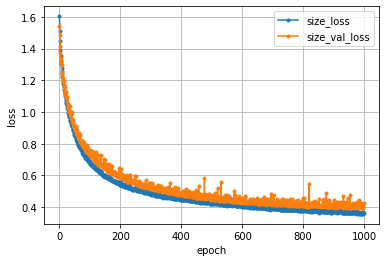

In [48]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [49]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(25, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [50]:
# 学習(位置)
epochs = 1000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Train on 8108 samples, validate on 2027 samples
Epoch 1/1000
8108/8108 [==============================] - 0s 44us/step - loss: 3.1456 - accuracy: 0.0889 - val_loss: 3.1234 - val_accuracy: 0.0740
Epoch 2/1000
8108/8108 [==============================] - 0s 31us/step - loss: 3.0453 - accuracy: 0.1190 - val_loss: 3.0713 - val_accuracy: 0.1095
Epoch 3/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9758 - accuracy: 0.1401 - val_loss: 3.0084 - val_accuracy: 0.1450
Epoch 4/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.9203 - accuracy: 0.1481 - val_loss: 2.9411 - val_accuracy: 0.1638
Epoch 5/1000
8108/8108 [==============================] - 0s 29us/step - loss: 2.8680 - accuracy: 0.1738 - val_loss: 2.9134 - val_accuracy: 0.1584
Epoch 6/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.8244 - accuracy: 0.1815 - val_loss: 2.8474 - val_accuracy: 0.1968
Epoch 7/1000
8108/8108 [==============================] - 0s 30us/step

8108/8108 [==============================] - 0s 31us/step - loss: 2.1684 - accuracy: 0.3505 - val_loss: 2.2218 - val_accuracy: 0.3690
Epoch 57/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1599 - accuracy: 0.3462 - val_loss: 2.2146 - val_accuracy: 0.3138
Epoch 58/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.1404 - accuracy: 0.3516 - val_loss: 2.2005 - val_accuracy: 0.3513
Epoch 59/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1477 - accuracy: 0.3510 - val_loss: 2.1789 - val_accuracy: 0.3557
Epoch 60/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.1297 - accuracy: 0.3632 - val_loss: 2.1787 - val_accuracy: 0.3409
Epoch 61/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.1328 - accuracy: 0.3592 - val_loss: 2.2306 - val_accuracy: 0.3320
Epoch 62/1000
8108/8108 [==============================] - 0s 30us/step - loss: 2.1268 - accuracy: 0.3575 - val_loss: 2.1714 -

8108/8108 [==============================] - 0s 31us/step - loss: 1.8452 - accuracy: 0.4212 - val_loss: 1.9557 - val_accuracy: 0.3902
Epoch 167/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8143 - accuracy: 0.4248 - val_loss: 1.9133 - val_accuracy: 0.4050
Epoch 168/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.7985 - accuracy: 0.4403 - val_loss: 1.9224 - val_accuracy: 0.3873
Epoch 169/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8478 - accuracy: 0.4175 - val_loss: 1.8830 - val_accuracy: 0.4391
Epoch 170/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.8124 - accuracy: 0.4340 - val_loss: 1.9273 - val_accuracy: 0.3902
Epoch 171/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8294 - accuracy: 0.4207 - val_loss: 1.9397 - val_accuracy: 0.3962
Epoch 172/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.8103 - accuracy: 0.4234 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.7447 - accuracy: 0.4456 - val_loss: 1.9138 - val_accuracy: 0.3927
Epoch 222/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7465 - accuracy: 0.4387 - val_loss: 1.8321 - val_accuracy: 0.4277
Epoch 223/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.7522 - accuracy: 0.4418 - val_loss: 1.8248 - val_accuracy: 0.4095
Epoch 224/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.7647 - accuracy: 0.4288 - val_loss: 1.8636 - val_accuracy: 0.3784
Epoch 225/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7575 - accuracy: 0.4452 - val_loss: 1.8076 - val_accuracy: 0.4371
Epoch 226/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.7531 - accuracy: 0.4352 - val_loss: 1.8290 - val_accuracy: 0.4420
Epoch 227/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.7228 - accuracy: 0.4556 - val_loss: 1.

8108/8108 [==============================] - 0s 34us/step - loss: 1.6958 - accuracy: 0.4502 - val_loss: 1.7547 - val_accuracy: 0.4381
Epoch 277/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6834 - accuracy: 0.4503 - val_loss: 1.7713 - val_accuracy: 0.4415
Epoch 278/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.7058 - accuracy: 0.4499 - val_loss: 1.8255 - val_accuracy: 0.4144
Epoch 279/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.6901 - accuracy: 0.4541 - val_loss: 1.7800 - val_accuracy: 0.4312
Epoch 280/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6693 - accuracy: 0.4661 - val_loss: 1.7476 - val_accuracy: 0.4262
Epoch 281/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.6723 - accuracy: 0.4673 - val_loss: 1.7894 - val_accuracy: 0.4198
Epoch 282/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.6806 - accuracy: 0.4586 - val_loss: 1.

8108/8108 [==============================] - 0s 32us/step - loss: 1.6502 - accuracy: 0.4650 - val_loss: 1.6334 - val_accuracy: 0.5106
Epoch 332/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6164 - accuracy: 0.4761 - val_loss: 1.7207 - val_accuracy: 0.4613
Epoch 333/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6338 - accuracy: 0.4655 - val_loss: 1.7864 - val_accuracy: 0.4307
Epoch 334/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6483 - accuracy: 0.4630 - val_loss: 1.7325 - val_accuracy: 0.4672
Epoch 335/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6417 - accuracy: 0.4631 - val_loss: 1.7428 - val_accuracy: 0.4253
Epoch 336/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6297 - accuracy: 0.4681 - val_loss: 1.7485 - val_accuracy: 0.4450
Epoch 337/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.6519 - accuracy: 0.4541 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.6119 - accuracy: 0.4795 - val_loss: 1.7069 - val_accuracy: 0.4188
Epoch 387/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5895 - accuracy: 0.4734 - val_loss: 1.6907 - val_accuracy: 0.4415
Epoch 388/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.6264 - accuracy: 0.4628 - val_loss: 1.6325 - val_accuracy: 0.4958
Epoch 389/1000
8108/8108 [==============================] - 0s 35us/step - loss: 1.6045 - accuracy: 0.4715 - val_loss: 1.6216 - val_accuracy: 0.4993
Epoch 390/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5904 - accuracy: 0.4912 - val_loss: 1.6927 - val_accuracy: 0.4401
Epoch 391/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5939 - accuracy: 0.4709 - val_loss: 1.6553 - val_accuracy: 0.4652
Epoch 392/1000
8108/8108 [==============================] - 0s 35us/step - loss: 1.6104 - accuracy: 0.4697 - val_loss: 1.

8108/8108 [==============================] - 0s 36us/step - loss: 1.5782 - accuracy: 0.4794 - val_loss: 1.6179 - val_accuracy: 0.4780
Epoch 442/1000
8108/8108 [==============================] - 0s 37us/step - loss: 1.5671 - accuracy: 0.4793 - val_loss: 1.6261 - val_accuracy: 0.4968
Epoch 443/1000
8108/8108 [==============================] - 0s 35us/step - loss: 1.5656 - accuracy: 0.4873 - val_loss: 1.6284 - val_accuracy: 0.4514
Epoch 444/1000
8108/8108 [==============================] - 0s 33us/step - loss: 1.5792 - accuracy: 0.4810 - val_loss: 1.6391 - val_accuracy: 0.4618
Epoch 445/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5517 - accuracy: 0.4919 - val_loss: 1.6055 - val_accuracy: 0.4874
Epoch 446/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5622 - accuracy: 0.4837 - val_loss: 1.6670 - val_accuracy: 0.4549
Epoch 447/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.5729 - accuracy: 0.4779 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.5472 - accuracy: 0.4942 - val_loss: 1.5909 - val_accuracy: 0.4588
Epoch 497/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5267 - accuracy: 0.4924 - val_loss: 1.6172 - val_accuracy: 0.4815
Epoch 498/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5360 - accuracy: 0.4867 - val_loss: 1.6225 - val_accuracy: 0.4662
Epoch 499/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5236 - accuracy: 0.4928 - val_loss: 1.6645 - val_accuracy: 0.4455
Epoch 500/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5257 - accuracy: 0.4905 - val_loss: 1.5906 - val_accuracy: 0.4928
Epoch 501/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5262 - accuracy: 0.4866 - val_loss: 1.6315 - val_accuracy: 0.4800
Epoch 502/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5334 - accuracy: 0.4936 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.5063 - accuracy: 0.4989 - val_loss: 1.6437 - val_accuracy: 0.4361
Epoch 552/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5031 - accuracy: 0.5090 - val_loss: 1.6111 - val_accuracy: 0.4618
Epoch 553/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.5274 - accuracy: 0.4931 - val_loss: 1.6088 - val_accuracy: 0.4711
Epoch 554/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5123 - accuracy: 0.4920 - val_loss: 1.6064 - val_accuracy: 0.4391
Epoch 555/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5014 - accuracy: 0.5042 - val_loss: 1.5964 - val_accuracy: 0.5037
Epoch 556/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5066 - accuracy: 0.5001 - val_loss: 1.6189 - val_accuracy: 0.4381
Epoch 557/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.5157 - accuracy: 0.4900 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4948 - accuracy: 0.4917 - val_loss: 1.4849 - val_accuracy: 0.5057
Epoch 607/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4717 - accuracy: 0.5042 - val_loss: 1.4942 - val_accuracy: 0.4953
Epoch 608/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4898 - accuracy: 0.5091 - val_loss: 1.5295 - val_accuracy: 0.5126
Epoch 609/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4650 - accuracy: 0.5165 - val_loss: 1.5544 - val_accuracy: 0.4504
Epoch 610/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4857 - accuracy: 0.4973 - val_loss: 1.5787 - val_accuracy: 0.4598
Epoch 611/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4783 - accuracy: 0.4951 - val_loss: 1.5405 - val_accuracy: 0.4800
Epoch 612/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4872 - accuracy: 0.4981 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4336 - accuracy: 0.5131 - val_loss: 1.5413 - val_accuracy: 0.4317
Epoch 662/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4531 - accuracy: 0.4999 - val_loss: 1.5079 - val_accuracy: 0.4790
Epoch 663/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4496 - accuracy: 0.5127 - val_loss: 1.5180 - val_accuracy: 0.5062
Epoch 664/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4426 - accuracy: 0.5133 - val_loss: 1.5992 - val_accuracy: 0.4608
Epoch 665/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4683 - accuracy: 0.5001 - val_loss: 1.5404 - val_accuracy: 0.4721
Epoch 666/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4391 - accuracy: 0.5184 - val_loss: 1.5297 - val_accuracy: 0.5096
Epoch 667/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4494 - accuracy: 0.5117 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4522 - accuracy: 0.5042 - val_loss: 1.5033 - val_accuracy: 0.4776
Epoch 717/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4297 - accuracy: 0.5173 - val_loss: 1.5363 - val_accuracy: 0.4628
Epoch 718/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4322 - accuracy: 0.5130 - val_loss: 1.4812 - val_accuracy: 0.4988
Epoch 719/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4311 - accuracy: 0.5142 - val_loss: 1.4656 - val_accuracy: 0.4785
Epoch 720/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4133 - accuracy: 0.5187 - val_loss: 1.4956 - val_accuracy: 0.4973
Epoch 721/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4634 - accuracy: 0.5020 - val_loss: 1.5490 - val_accuracy: 0.4499
Epoch 722/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4343 - accuracy: 0.5136 - val_loss: 1.

8108/8108 [==============================] - 0s 31us/step - loss: 1.4274 - accuracy: 0.5088 - val_loss: 1.4848 - val_accuracy: 0.4785
Epoch 772/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.4018 - accuracy: 0.5206 - val_loss: 1.4506 - val_accuracy: 0.5081
Epoch 773/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4176 - accuracy: 0.5111 - val_loss: 1.4263 - val_accuracy: 0.4914
Epoch 774/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3999 - accuracy: 0.5212 - val_loss: 1.4580 - val_accuracy: 0.5136
Epoch 775/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4221 - accuracy: 0.5221 - val_loss: 1.4195 - val_accuracy: 0.5594
Epoch 776/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4070 - accuracy: 0.5224 - val_loss: 1.4984 - val_accuracy: 0.4899
Epoch 777/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4157 - accuracy: 0.5171 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.4179 - accuracy: 0.5063 - val_loss: 1.4365 - val_accuracy: 0.4657
Epoch 827/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3986 - accuracy: 0.5187 - val_loss: 1.5022 - val_accuracy: 0.5047
Epoch 828/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4185 - accuracy: 0.5115 - val_loss: 1.4481 - val_accuracy: 0.5002
Epoch 829/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.4053 - accuracy: 0.5216 - val_loss: 1.4041 - val_accuracy: 0.4884
Epoch 830/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3706 - accuracy: 0.5222 - val_loss: 1.4392 - val_accuracy: 0.5269
Epoch 831/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3606 - accuracy: 0.5402 - val_loss: 1.4790 - val_accuracy: 0.4780
Epoch 832/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.4132 - accuracy: 0.5079 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3753 - accuracy: 0.5234 - val_loss: 1.4323 - val_accuracy: 0.5530
Epoch 882/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3687 - accuracy: 0.5269 - val_loss: 1.4888 - val_accuracy: 0.5057
Epoch 883/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3609 - accuracy: 0.5316 - val_loss: 1.3646 - val_accuracy: 0.5491
Epoch 884/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3881 - accuracy: 0.5217 - val_loss: 1.4631 - val_accuracy: 0.4854
Epoch 885/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3988 - accuracy: 0.5152 - val_loss: 1.3968 - val_accuracy: 0.4988
Epoch 886/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3760 - accuracy: 0.5258 - val_loss: 1.3958 - val_accuracy: 0.5170
Epoch 887/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3645 - accuracy: 0.5278 - val_loss: 1.

8108/8108 [==============================] - 0s 30us/step - loss: 1.3792 - accuracy: 0.5217 - val_loss: 1.4294 - val_accuracy: 0.5062
Epoch 937/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3568 - accuracy: 0.5333 - val_loss: 1.4421 - val_accuracy: 0.4815
Epoch 938/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3584 - accuracy: 0.5319 - val_loss: 1.4163 - val_accuracy: 0.5121
Epoch 939/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3643 - accuracy: 0.5273 - val_loss: 1.4027 - val_accuracy: 0.5358
Epoch 940/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3622 - accuracy: 0.5337 - val_loss: 1.4437 - val_accuracy: 0.5047
Epoch 941/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3460 - accuracy: 0.5307 - val_loss: 1.4477 - val_accuracy: 0.5323
Epoch 942/1000
8108/8108 [==============================] - 0s 30us/step - loss: 1.3460 - accuracy: 0.5398 - val_loss: 1.

8108/8108 [==============================] - 0s 33us/step - loss: 1.3249 - accuracy: 0.5471 - val_loss: 1.3884 - val_accuracy: 0.5264
Epoch 992/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3419 - accuracy: 0.5343 - val_loss: 1.3560 - val_accuracy: 0.5422
Epoch 993/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3577 - accuracy: 0.5282 - val_loss: 1.3391 - val_accuracy: 0.5590
Epoch 994/1000
8108/8108 [==============================] - 0s 32us/step - loss: 1.3455 - accuracy: 0.5348 - val_loss: 1.4209 - val_accuracy: 0.4953
Epoch 995/1000
8108/8108 [==============================] - 0s 37us/step - loss: 1.3366 - accuracy: 0.5446 - val_loss: 1.4237 - val_accuracy: 0.5451
Epoch 996/1000
8108/8108 [==============================] - 0s 40us/step - loss: 1.3404 - accuracy: 0.5327 - val_loss: 1.3668 - val_accuracy: 0.5234
Epoch 997/1000
8108/8108 [==============================] - 0s 31us/step - loss: 1.3281 - accuracy: 0.5419 - val_loss: 1.

In [52]:
# モデルの評価(位置)
position_score = position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2027/2027 [==============================] - 0s 38us/step
Test loss: 1.4281227112286892
Test accuracy: 0.4943265914916992


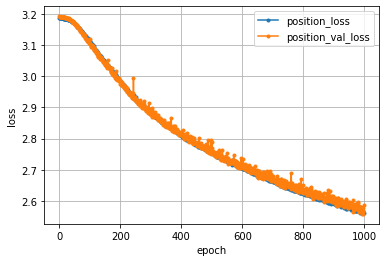

In [38]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()